In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
pd.set_option('display.max_columns',10,'display.width',1000)
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vovk, Mr. Janko",male,...,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [9]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [10]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Number of Males in the Titanic : 577
Number of Females in the Titanic : 314


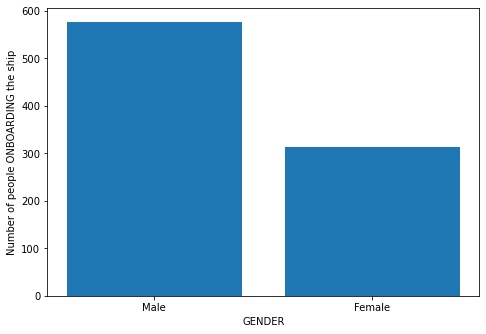

In [13]:
male=len(train[train['Sex']=='male'])
print("Number of Males in the Titanic :",male)

female=len(train[train['Sex']=='female'])
print("Number of Females in the Titanic :",female)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gen=['Male','Female']
ind=[577,314]

ax.bar(gen,ind)
plt.xlabel("GENDER")
plt.ylabel("Number of people ONBOARDING the ship")
plt.show()

In [14]:
alive=len(train[train['Survived']==1])
dead=len(train[train['Survived']==0])

train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


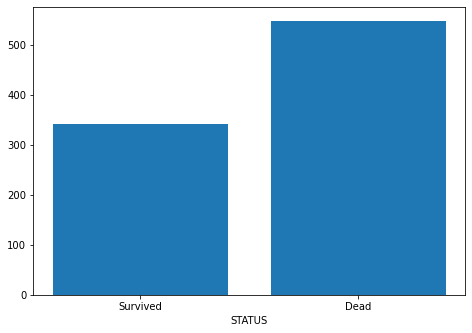

In [16]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
status=['Survived','Dead']
ind=[alive,dead]

ax.bar(status,ind)
plt.xlabel("STATUS")
plt.show()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

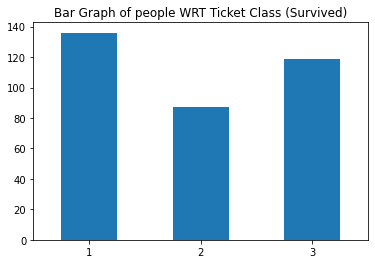

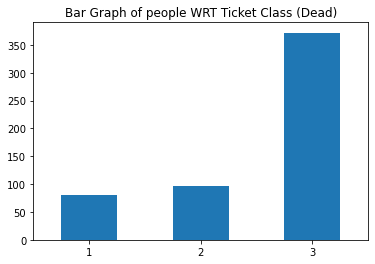

In [20]:
plt.figure(1)
train.loc[train['Survived']==1,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar Graph of people WRT Ticket Class (Survived)')
plt.xticks(rotation=0)

plt.figure(2)
train.loc[train['Survived']==0,'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar Graph of people WRT Ticket Class (Dead)')
plt.xticks(rotation=0)

([<matplotlib.axis.XTick at 0x21d4c082c40>,
 <a list of 10 Text major ticklabel objects>)

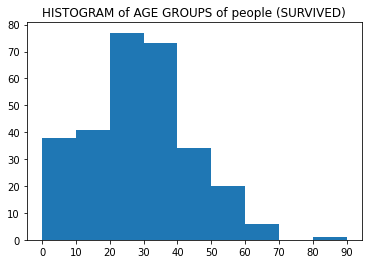

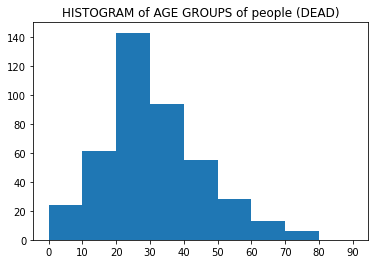

In [25]:
plt.figure()

age=train.loc[train.Survived==1,'Age']
plt.title("HISTOGRAM of AGE GROUPS of people (SURVIVED)")
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

plt.figure(2)

age=train.loc[train.Survived==0,'Age']
plt.title("HISTOGRAM of AGE GROUPS of people (DEAD)")
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [26]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [27]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [30]:
train[['Age','Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age',ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [31]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


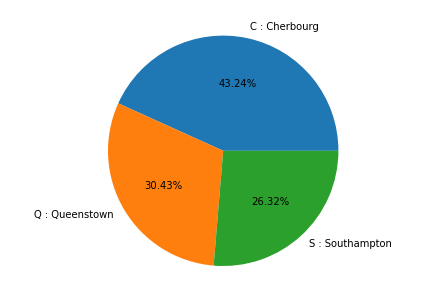

In [33]:
fig=plt.figure()

ax=fig.add_axes([0,0,1,1])
ax.axis('Equal')

l=['C : Cherbourg','Q : Queenstown','S : Southampton']
s=[0.553571,0.389610,0.336957]

ax.pie(s,labels=l,autopct='%1.2f%%')
plt.show()

In [35]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Beattie, Mr. Thomson",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,...,0.000000,NaN,31.500000,NaN,NaN


In [36]:
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)

train=train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)

train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

coltrain=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
x=train[coltrain]
y=train['Survived']

x['Age'].isnull().sum()
x['Pclass'].isnull().sum()
x['SibSp'].isnull().sum()
x['Parch'].isnull().sum()
x['Fare'].isnull().sum()
x['Sex'].isnull().sum()
x['Embarked'].isnull().sum()



2

In [37]:
x['Age']=x['Age'].fillna(x['Age'].median())
x['Age'].isnull().sum()

0

In [41]:
x['Embarked']=x['Embarked'].fillna(method='pad')
x['Embarked'].isnull().sum()

0

In [42]:
d={'male':0,'female':1}
x['Sex']=x['Sex'].apply(lambda x:d[x])
x['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [43]:
e={'C':0,'Q':1,'S':2}
x['Embarked']=x['Embarked'].apply(lambda x:e[x])
x['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [47]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score :",accuracy_score(y_test,ypred))



Accuracy Score : 0.7574626865671642


In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix

conmat=confusion_matrix(y_test,ypred)
print(conmat)


[[130  26]
 [ 39  73]]


In [50]:
from sklearn.svm import SVC

m1=SVC()
m1.fit(x_train,y_train)

ypred=m1.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score :",accuracy_score(y_test,ypred))

Accuracy Score : 0.6604477611940298


In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
conmat=confusion_matrix(y_test,ypred)
print(conmat)
print(classification_report(y_test,ypred))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [56]:
from sklearn.neighbors import KNeighborsClassifier

m2= KNeighborsClassifier(n_neighbors=5)
m2.fit(x_train,y_train)
ypred2=m2.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score :",accuracy_score(y_test,ypred2))

Accuracy Score : 0.6604477611940298


In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
conmat=confusion_matrix(y_test,ypred2)
print(conmat)
print(classification_report(y_test,ypred2))

[[126  30]
 [ 61  51]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       156
           1       0.63      0.46      0.53       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [59]:
from sklearn.naive_bayes import GaussianNB

m3=GaussianNB()
m3.fit(x_train,y_train)
ypred3=m3.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score :",accuracy_score(y_test,ypred3))

Accuracy Score : 0.7686567164179104


In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
conmat=confusion_matrix(y_test,ypred3)
print(conmat)
print(classification_report(y_test,ypred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [61]:
from sklearn.tree import DecisionTreeClassifier

m4=DecisionTreeClassifier(criterion='entropy',random_state=7)
m4.fit(x_train,y_train)
ypred4=m4.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score :",accuracy_score(y_test,ypred4))

Accuracy Score : 0.7425373134328358


In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
conmat=confusion_matrix(y_test,ypred4)
print(conmat)
print(classification_report(y_test,ypred4))

[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [64]:
res=pd.DataFrame({'MODEL' : ['Logistic Regression','Support Vector Machines','Naive Bayes','KNN','Decision Tree'],
                  'SCORE' : [0.75,0.66,0.76,0.66,.074]})

resdf= res.sort_values(by='SCORE',ascending=False)
resdf=res.set_index('SCORE')
resdf.head(10)

,MODEL
SCORE,
0.750,Logistic Regression
0.660,Support Vector Machines
0.760,Naive Bayes
0.660,KNN
0.074,Decision Tree
